# Intoduction 
<br>

 **The sinking of the Titanic is one of the most infamous shipwrecks in history.**

The main idea is simple, analyse dataset and predict who of the pasenges Titanic suvrvive or die.
Ticanic dataset contain information about passengers, like age, sex, calss of cabing and ect.
Full describtion below.

 - survival:	Survival	0 = No, 1 = Yes
 - pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
 - sex:	    Sex	
 - age:	    Age in years	
 - sibsp:    	# of siblings / spouses aboard the Titanic	
 - parch:	# of parents / children aboard the Titanic	
 - ticket:	Ticket number	
 - fare:    Passenger fare	
 - cabin:	Cabin number	
 - embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Questions

1. Does the passenger's survival depend on the class of service?
2. Does the survival rate of a passenger depend on age?
3. Does the survival of passengers depend on gender?
4. Predict the number of passengers who managed to survive.


# Reading data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.decomposition import PCA

In [4]:
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder

In [5]:
train_data = pd.read_csv('/Users/Rocky/jupyter_home_folder/kaggle/titanic/train.csv')
test_data = pd.read_csv('/Users/Rocky/jupyter_home_folder/kaggle/titanic/test.csv')
gender_submission_data = pd.read_csv('/Users/Rocky/jupyter_home_folder/kaggle/titanic/gender_submission.csv')

In [6]:

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_data.shape

(891, 12)

In [10]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Cleaning

In [14]:
merged_df = pd.merge(test_data, gender_submission_data, on='PassengerId')
concated_data = pd.concat([train_data, merged_df])
concated_data['Embarked'] = concated_data['Embarked'].fillna(0)
concated_data['Fare'] = concated_data['Fare'].fillna(concated_data['Fare'].mean())

In [15]:
concated_data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [16]:
concated_data = concated_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [17]:
passengers_mean_age = concated_data.groupby('Sex')['Age'].mean()
passengers_mean_age

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [18]:
passengers_mean_age['male']

30.58522796352584

In [19]:
female_mean = passengers_mean_age['female']
male_mean = passengers_mean_age['male']

concated_data.loc[(concated_data['Sex'] == 'male') & (concated_data['Age'].isnull()), 'Age']  = male_mean
concated_data.loc[(concated_data['Sex'] == 'female') & (concated_data['Age'].isnull()), 'Age'] = female_mean


In [20]:
sex_m_f = pd.get_dummies(concated_data['Sex'])
concated_data['Sex(M1/F0)'] = sex_m_f.drop(['female'], axis=1).rename(columns={'male': 'sex'})
concated_data = concated_data.drop(['Sex'], axis=1)


In [21]:
concated_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex(M1/F0)
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


# EDA

1. **Does the survival rate of passengers depend on the class?**
 <br>
 <br>
Even before data analysis begins, we can assume that first-class passengers were closer to the lifeboats at the time of the crash, which should have a positive effect on the results. There was also a class division and the status of first class passengers could influence the priority of access to lifeboats.
<br>

In [22]:
all_pepople_class_1 = (concated_data['Pclass'] == 1).sum()
all_pepople_class_2 = (concated_data['Pclass'] == 2).sum()
all_pepople_class_3 = (concated_data['Pclass'] == 3).sum()

Amount people on the Titanic(train set) = 1309 person.


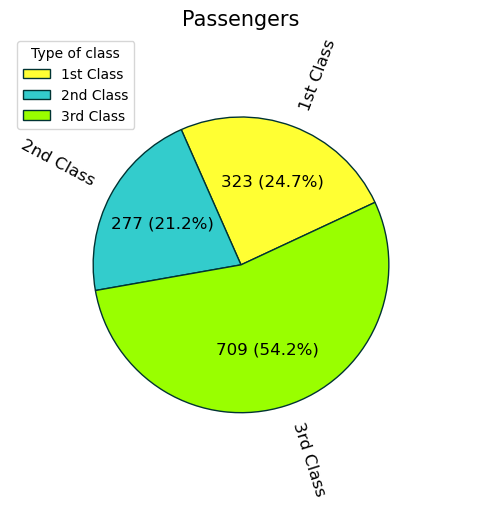

In [95]:
vals = [all_pepople_class_1, all_pepople_class_2, all_pepople_class_3]
labels = ['1st Class', '2nd Class', '3rd Class']
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#FFFF33','#33CCCC', '#99FF00']
wedgeprops = {'lw': 1, 'ls': '-', 'edgecolor':'#003333'}

def my_autopct(pct):
    return '{:.0f} ({:.1f}%)'.format(pct*sum(vals)/100, pct)
ax.pie(vals, colors=colors, 
       wedgeprops=wedgeprops, 
       labels=labels,
       shadow=False,
       autopct=my_autopct, 
       rotatelabels=True, 
       radius=0.8, 
       textprops={'fontsize':12},
       startangle=25)

ax.legend(loc='best', title='Type of class',fontsize=10)
ax.set_title('Passengers', fontsize=15)
ax.set_facecolor('#CCFFFF')

all_people = (all_pepople_class_1 + all_pepople_class_2 + all_pepople_class_3)
print(f"Amount people on the Titanic(train set) = {all_people} person.")

plt.show()

# The pie shows the number of passengers and the distribution of the classes.

In [24]:
surv_class_1 = ((concated_data['Survived'] == 1) & (concated_data['Pclass'] == 1)).sum()
die_class_1 = ((concated_data['Survived'] == 0) & (concated_data['Pclass'] == 1)).sum()
surv_class_2 = ((concated_data['Survived'] == 1) & (concated_data['Pclass'] == 2)).sum()
die_class_2 = ((concated_data['Survived'] == 0) & (concated_data['Pclass'] == 2)).sum()
surv_class_3 = ((concated_data['Survived'] == 1) & (concated_data['Pclass'] == 3)).sum()
die_class_3 = ((concated_data['Survived'] == 0) & (concated_data['Pclass'] == 3)).sum()

In [25]:
surv_of_all_class_1 = ((surv_class_1 / all_pepople_class_1) * 100).round()
die_of_all_class_1 = ((die_class_1 / all_pepople_class_1) * 100).round()
print(f"Persent survived of first class : {surv_of_all_class_1}%, and died: {die_of_all_class_1}%.")

surv_of_all_class_2 = ((surv_class_2 / all_pepople_class_2) * 100).round()
die_of_all_class_2 = ((die_class_2 / all_pepople_class_2) * 100).round()

print(f"Persent survived of second class : {surv_of_all_class_2}%, and died: {die_of_all_class_2}%.")

surv_of_all_class_3 = ((surv_class_3 / all_pepople_class_3) * 100).round()
die_of_all_class_3 = ((die_class_3 / all_pepople_class_3) * 100).round()

print(f"Persent survived of third class : {surv_of_all_class_3}%, and died: {die_of_all_class_3}%.")

Persent survived of first class : 58.0%, and died: 42.0%.
Persent survived of second class : 42.0%, and died: 58.0%.
Persent survived of third class : 27.0%, and died: 73.0%.



<br>
Based on the obtained values, we can assume that the survival rate among passengers of the first class is much higher than that of the second and third. And only the first class has more survivors than the dead.
<br>
<br>


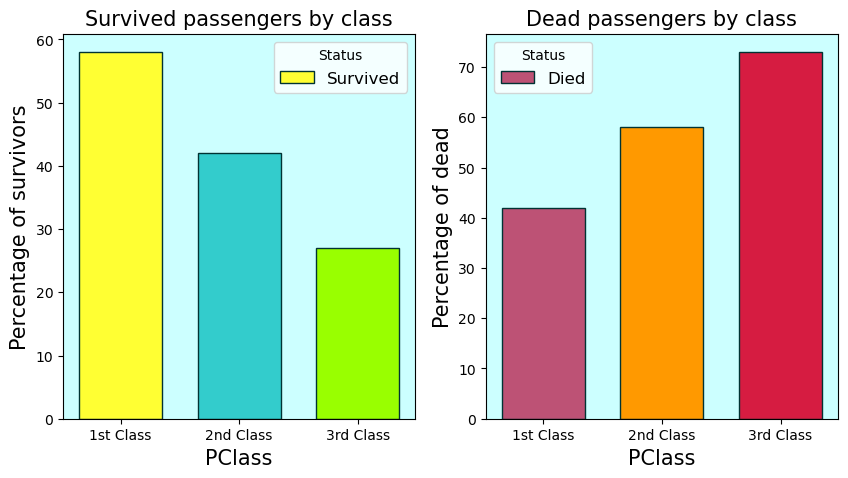

In [26]:

classes = ['1st Class', '2nd Class', '3rd Class']
survived = [surv_of_all_class_1, surv_of_all_class_2, surv_of_all_class_3]
not_survived = [die_of_all_class_1, die_of_all_class_2, die_of_all_class_3]
colors = ['#FFFF33','#33CCCC', '#99FF00', '#BD5275', '#FF9900', '#D61C41']

bar_width = 0.7

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].bar(classes, survived, bar_width, label='Survived', color=colors[0:3], lw = 1, ls = '-', 
       edgecolor = '#003333')
ax[0].set_xlabel('PClass', fontsize=15)
ax[0].set_ylabel('Percentage of survivors', fontsize=15)
ax[0].set_title('Survived passengers by class', fontsize=15)
ax[0].legend(loc='best', title='Status',fontsize=12)
ax[0].set_facecolor('#CCFFFF')

ax[1].bar(classes, not_survived, bar_width, label='Died', color=colors[3:6], lw = 1, ls = '-',
      edgecolor = '#003333')
ax[1].set_xlabel('PClass', fontsize=15)
ax[1].set_ylabel('Percentage of dead', fontsize=15)
ax[1].set_title('Dead passengers by class', fontsize=15)
ax[1].legend(loc='best', title='Status', fontsize=12)
ax[1].set_facecolor('#CCFFFF')

plt.show()

   **2. Does passenger survival depend on age?**

To begin with, let's try to divide all passengers into three age groups, for example:
- Group 1 - children and teenagers from 0 to 17 years old.
- Group 2 - young people and middle-aged people from 18 to 40 years old.
- Group 3 - middle-aged and elderly people over 41 years old.

Consider survival and mortality in three groups. Group 2 is expected to have the highest mortality since the average age of passengers is approximately 30 years old, which suggests that this group will have the most people.

In [27]:
group_1 = concated_data[concated_data['Age'] <= 17]['Age']
print(f"Number of people in group № 1 = {group_1.count()} and mean age =  {round(group_1.mean(), 1)}")
group_2 = concated_data[(concated_data['Age'] >= 18) & (concated_data['Age'] <= 40)]['Age']
print(f"Number of people in group № 2 = {group_2.count()} and mean age =  {round(group_2.mean(), 1)}")
group_3 = concated_data[concated_data['Age'] >= 41]['Age']
print(f"Number of people in group № 3 = {group_3.count()} and mean age =  {round(group_3.mean(), 1)}")

Number of people in group № 1 = 154 and mean age =  9.1
Number of people in group № 2 = 928 and mean age =  28.2
Number of people in group № 3 = 224 and mean age =  51.1


In [28]:
surv_group_1 = ((concated_data['Age'] <= 17) & (concated_data['Survived'] == 1 )).sum()
died_group_1 = ((concated_data['Age'] <= 17) & (concated_data['Survived'] == 0 )).sum()
print(f"The probability of survival for age group №1 is: {round(surv_group_1 / group_1.count() * 100, 1)} % ({surv_group_1} people)")
print(f"The probability of death for age group №1 is: {round(died_group_1 / group_1.count() * 100, 1)} % ({died_group_1} people)")
surv_group_2 = (((concated_data['Age'] >= 17) & (concated_data['Age'] <= 40)) & (concated_data['Survived'] == 1 )).sum()
died_group_2 = (((concated_data['Age'] >= 17) & (concated_data['Age'] <= 40)) & (concated_data['Survived'] == 0 )).sum()
print(f"The probability of survival for age group №2 is: {round(surv_group_2 / group_2.count() * 100, 1)} % ({surv_group_2} people)")
print(f"The probability of death for age group №2 is: {round(died_group_2 / group_2.count() * 100, 1)} % ({died_group_2} people)")
surv_group_3 = ((concated_data['Age'] >= 41) & (concated_data['Survived'] == 1 )).sum()
died_group_3 = ((concated_data['Age'] >= 41) & (concated_data['Survived'] == 0 )).sum()
print(f"The probability of survival for age group №3 is: {round(surv_group_3 / group_3.count() * 100, 1)} % ({surv_group_3} people)")
print(f"The probability of death for age group №3 is: {round(died_group_3 / group_3.count() * 100, 1)} % ({died_group_3} people)")


The probability of survival for age group №1 is: 50.6 % (78 people)
The probability of death for age group №1 is: 49.4 % (76 people)
The probability of survival for age group №2 is: 36.5 % (339 people)
The probability of death for age group №2 is: 65.6 % (609 people)
The probability of survival for age group №3 is: 37.9 % (85 people)
The probability of death for age group №3 is: 62.1 % (139 people)


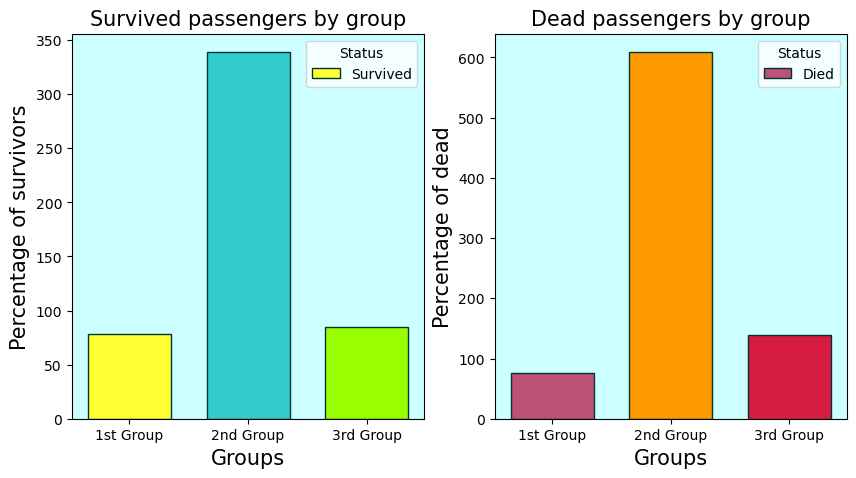

In [29]:
classes = ['1st Group', '2nd Group', '3rd Group']
survived = [surv_group_1, surv_group_2, surv_group_3]
not_survived = [died_group_1, died_group_2, died_group_3]
colors = ['#FFFF33','#33CCCC', '#99FF00', '#BD5275', '#FF9900', '#D61C41']
bar_width = 0.7

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].bar(classes, survived, bar_width, label='Survived', color=colors[0:3], lw = 1, ls = '-', 
       edgecolor = '#003333')
ax[0].set_xlabel('Groups', fontsize=15)
ax[0].set_ylabel('Percentage of survivors', fontsize=15)
ax[0].set_title('Survived passengers by group', fontsize=15)
ax[0].legend(loc='best', title='Status',fontsize=10)
ax[0].set_facecolor('#CCFFFF')

ax[1].bar(classes, not_survived, bar_width, label='Died', color=colors[3:6], lw = 1, ls = '-',
      edgecolor = '#003333')
ax[1].set_xlabel('Groups', fontsize=15)
ax[1].set_ylabel('Percentage of dead', fontsize=15)
ax[1].set_title('Dead passengers by group', fontsize=15)
ax[1].legend(loc='best', title='Status', fontsize=10)
ax[1].set_facecolor('#CCFFFF')
plt.show()

- Does passenger survival depend on gender? After we have received data on the survival of passengers from different age groups and class of accommodation, which is almost equal to the social class, I think it is necessary to also look at the survival of passengers depending on gender.

**3.Does the survival of passengers depend on gender?**
<br>
<br>
It is assumed that women and children were rescued first and it is expected that the female survival rate will be much higher.
<br>

In [30]:
number_women = (concated_data['Sex(M1/F0)'] == 0).sum()
survived_women = ((concated_data['Sex(M1/F0)'] == 0) & (concated_data['Survived'] == 1)).sum()

print(f'The percentage of female survivors on the Titanic is {survived_women} / {number_women} = ' 
      f'{round(survived_women / number_women, 2)} %')

The percentage of female survivors on the Titanic is 385 / 466 = 0.83 %


In [31]:
number_men = (concated_data['Sex(M1/F0)'] == 1).sum()
survived_men = ((concated_data['Sex(M1/F0)'] == 1) & (concated_data['Survived'] == 1)).sum()

print(f'The percentage of male survivors on the Titanic is {survived_men} / {number_men} = ' 
      f'{round(survived_men / number_men, 2)} %')

The percentage of male survivors on the Titanic is 109 / 843 = 0.13 %


- As we expected, the survival rate of women is higher than that of men (6.4 times).

# Feature encoding 

In [32]:
concated_data['Young'] = np.where(
    (concated_data['Age'] >= 18) & (concated_data['Age'] <= 35 ) & (concated_data['Pclass'] == 1), 1, 0)

In [33]:
pcalass_transformed = pd.get_dummies(concated_data['Pclass'], prefix='Pclass', drop_first=True)
concated_data= concated_data.drop('Pclass', axis=1)
concated_data = pd.concat([concated_data, pcalass_transformed], axis=1)

In [34]:
embarked_transformed = pd.get_dummies(concated_data['Embarked'], prefix='Embarked', drop_first=True)
concated_data= concated_data.drop('Embarked', axis=1)
concated_data = pd.concat([concated_data, embarked_transformed], axis=1)

In [35]:

# fig = plt.figure()
# fig.set_size_inches(16, 10)

# hm = sns.heatmap(concated_data.corr(),
#                  annot=True, 
#                  fmt='.1g',
#                  xticklabels=concated_data.corr().columns,
#                  yticklabels=concated_data.corr().columns,
#                  cmap='PiYG',
#                  vmin=-1,
#                  vmax=1, 
#                  center=0,
#                  linewidths=1.5,
#                  linecolor='#669966')

# hm.set_facecolor=('#DEB887')
# hm.set_title('Numeric columns correlation', fontsize=35, color='black')
# hm.tick_params(axis='both', labelsize=17, color='black')

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [36]:
# concated_data = concated_data.drop('Embarked_S', axis=1)

In [37]:
# def get_redundant_pairs(concated_data):
#     pairs_to_drop = set()
#     cols = concated_data.columns
#     for i in range(0, concated_data.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=5):
#     au_corr = concated_data.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(concated_data)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# print(get_top_abs_correlations(train_data, 10))

In [38]:
# cutter = VarianceThreshold(threshold=0.01)
# cutter.fit(concated_data)

# cutter.get_feature_names_out()

In [39]:
# concated_data.columns

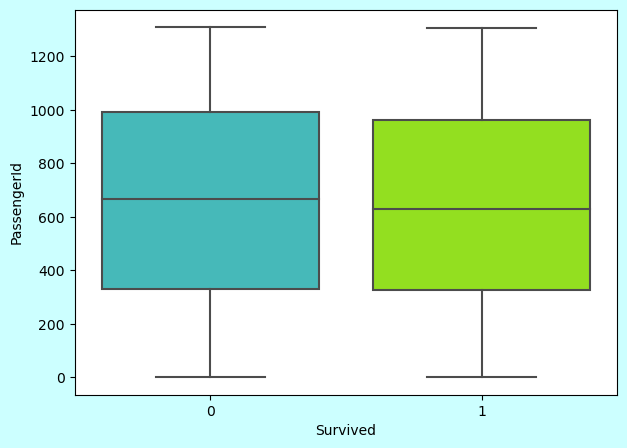

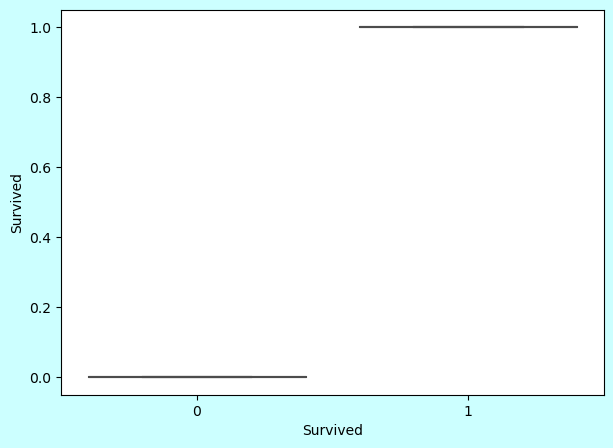

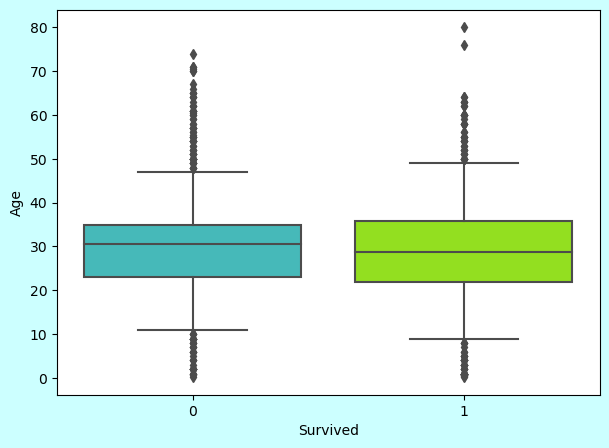

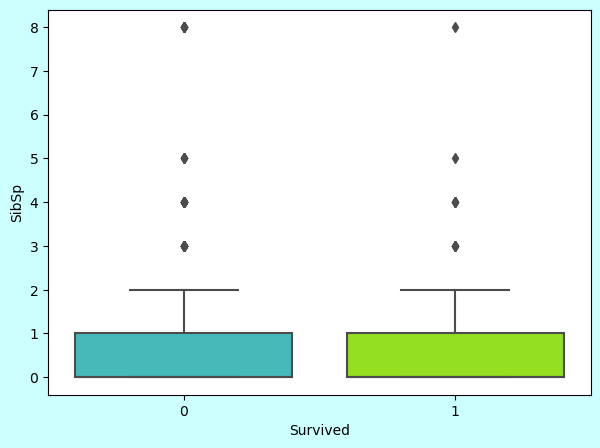

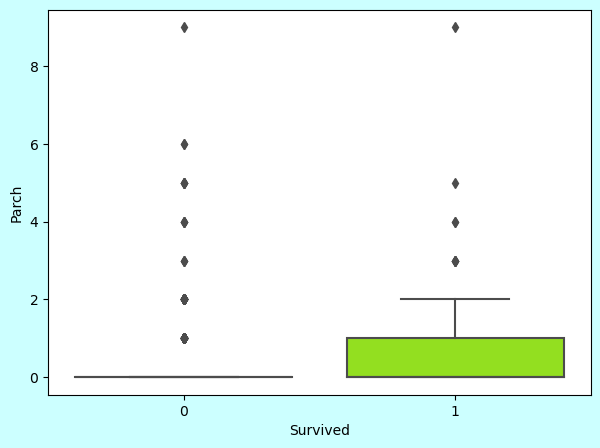

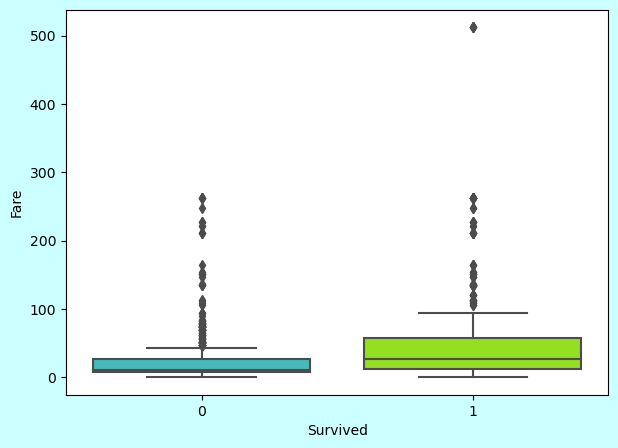

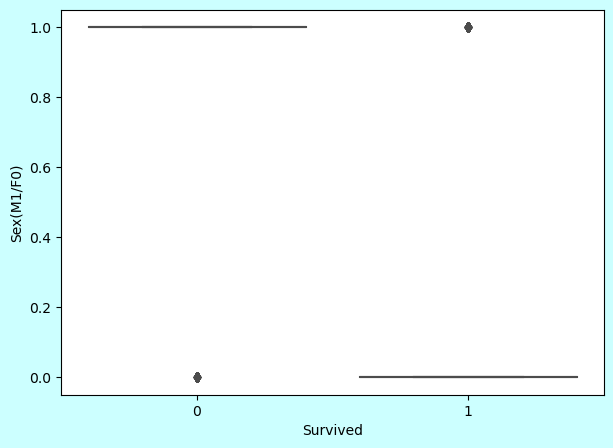

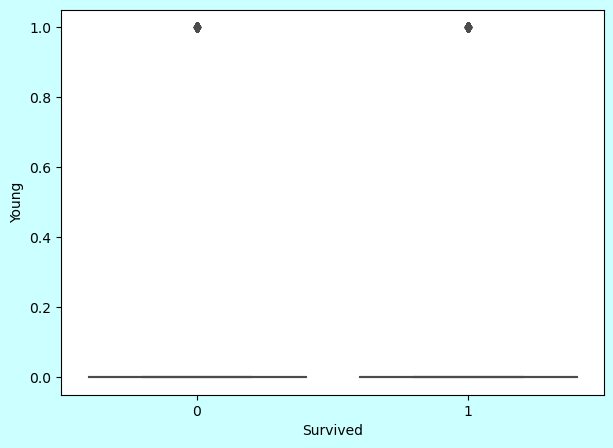

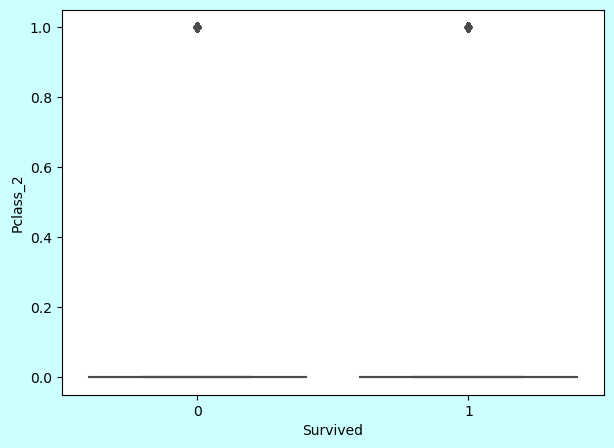

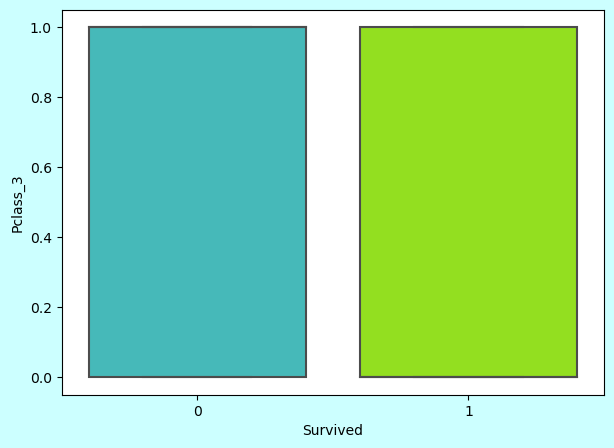

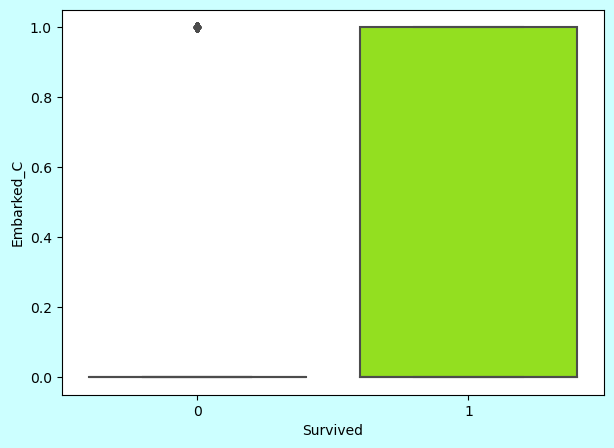

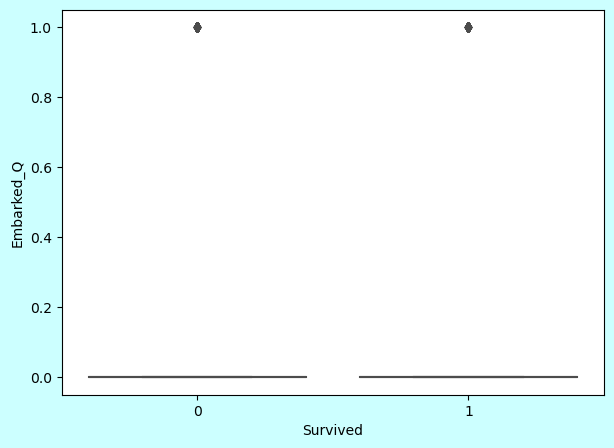

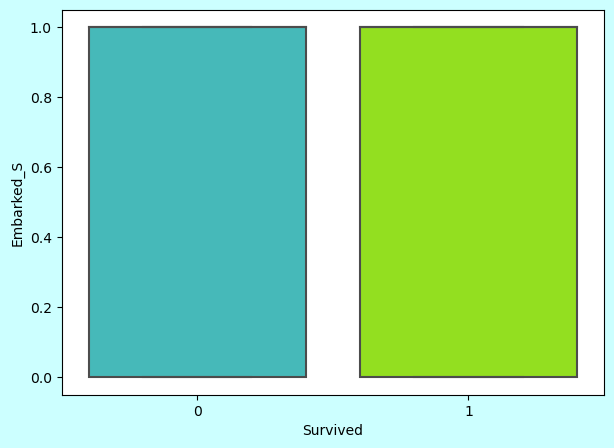

In [40]:
for col in concated_data:
    
    fig = plt.figure()
    fig.set_size_inches(7, 5)
    
    sns.color_palette()
    
    sns.boxplot(y=col, x=concated_data['Survived'].astype('category'),\
                data=concated_data, palette=['#33CCCC', '#99FF00'], whis=1)
    fig.set_facecolor('#CCFFFF')
    plt.show()

### PCA

In [41]:
X_pca = concated_data.drop('Survived', axis=1)
Y_pca = concated_data['Survived']

In [42]:
X_pca = X_pca.subtract(X_pca.mean())

In [43]:
pca = PCA(n_components=2)
pca_train_data = pca.fit_transform(X_pca)

pca_train_data = pd.DataFrame(pca_train_data, columns=['col_1', 'col_2'])


In [44]:
first_corr = X_pca.corrwith(pca_train_data.col_1) 
second_corr = X_pca.corrwith(pca_train_data.col_2)

corrs_matrix = pd.concat((first_corr, second_corr), axis=1)
corrs_matrix.columns = ['col_1', 'col_2']

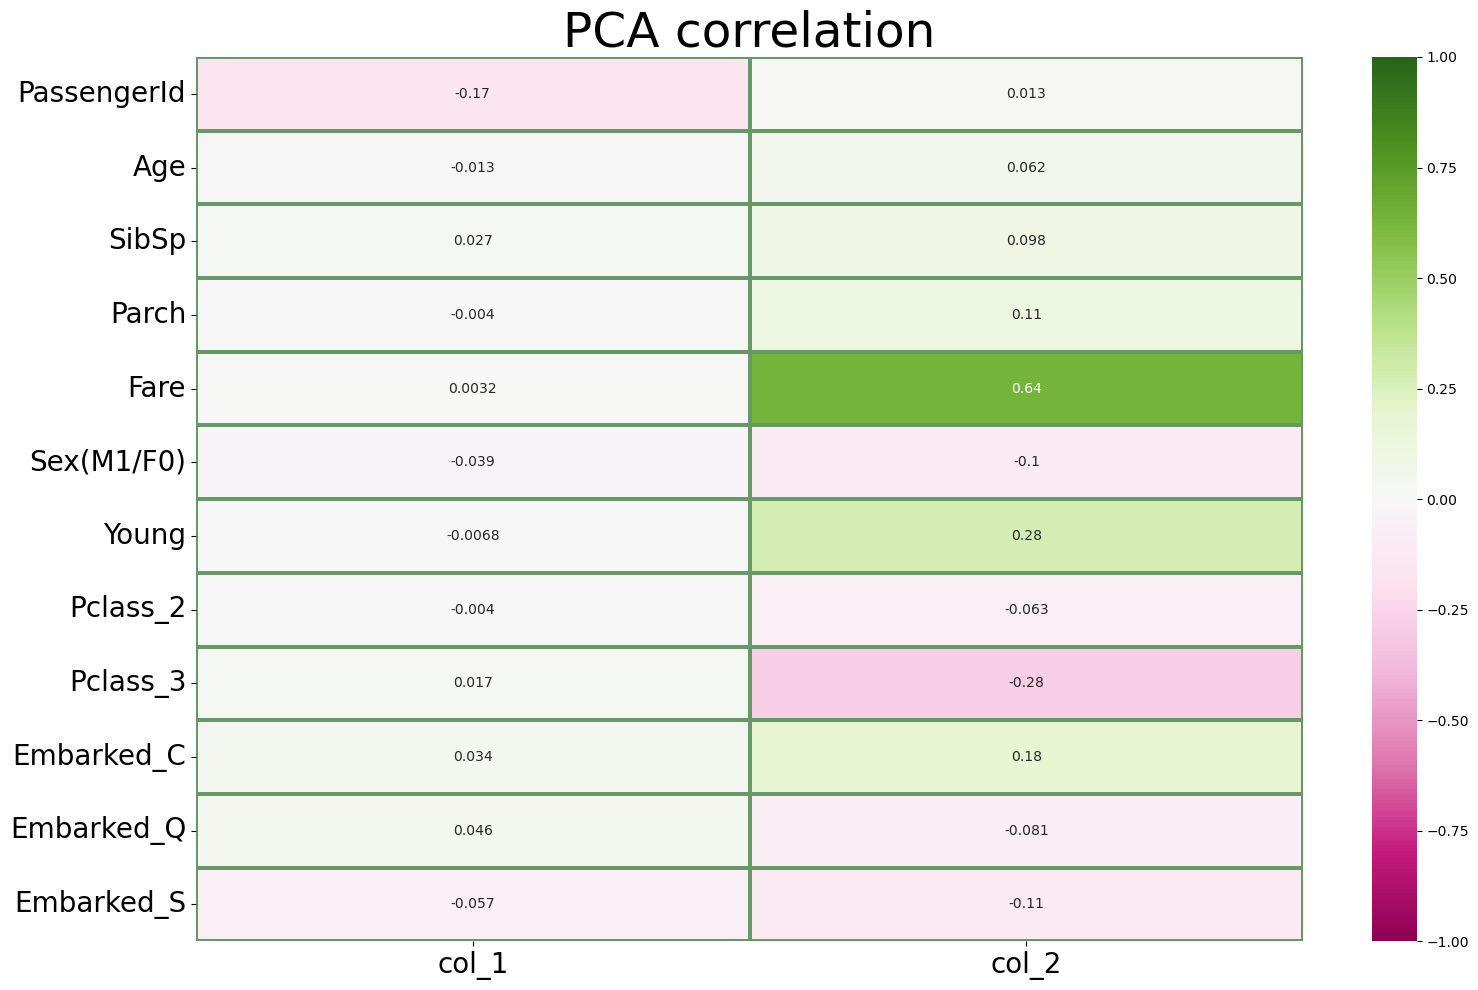

In [45]:
fig = plt.figure(figsize=(16, 10))

hm = sns.heatmap(corrs_matrix,
                annot=True,
                xticklabels=corrs_matrix.columns,
                yticklabels=corrs_matrix.index,
                cmap='PiYG',
                vmin=-1,
                vmax=1,
                center=0,
                linewidths=1.5,
                linecolor='#669966')

hm.set_facecolor=('#DEB887')
hm.set_title('PCA correlation', fontsize=35, color='black')
hm.tick_params(axis='both', labelsize=20, color='black')
plt.tight_layout()
plt.show()

In [46]:
PCA_train_data = np.concatenate((pca_train_data.values, Y_pca.values.reshape(-1, 1)), axis=1)

In [47]:
PCA_train_data = pd.DataFrame(PCA_train_data, columns=['col_1', 'col_2', 'survived']) 

<AxesSubplot:xlabel='col_1', ylabel='col_2'>

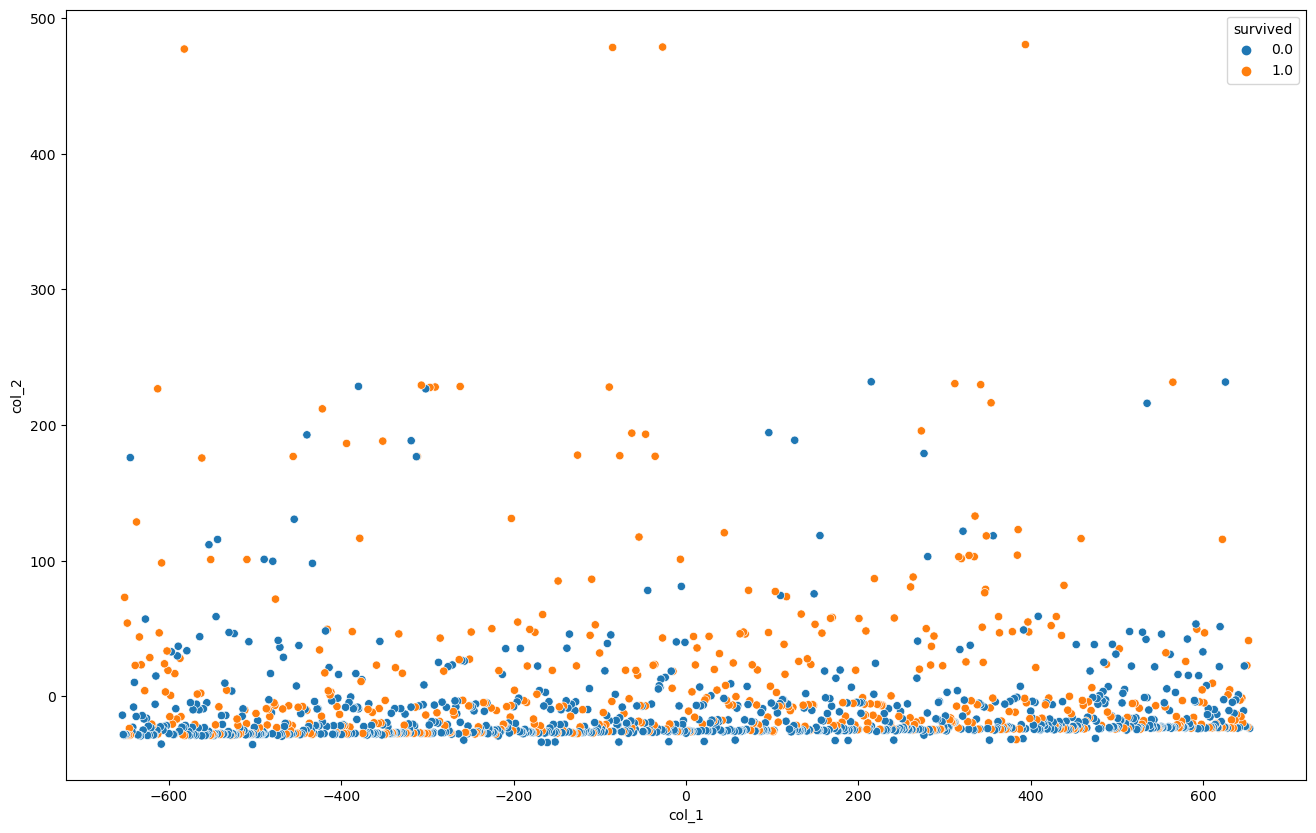

In [48]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_train_data, x="col_1", y="col_2", hue="survived")

In [49]:
PCA_train_data = PCA_train_data.drop('survived', axis=1)
new_merge = pd.merge(concated_data, PCA_train_data, left_index=True, right_index=True)
sorted_df = new_merge.sort_values('PassengerId')

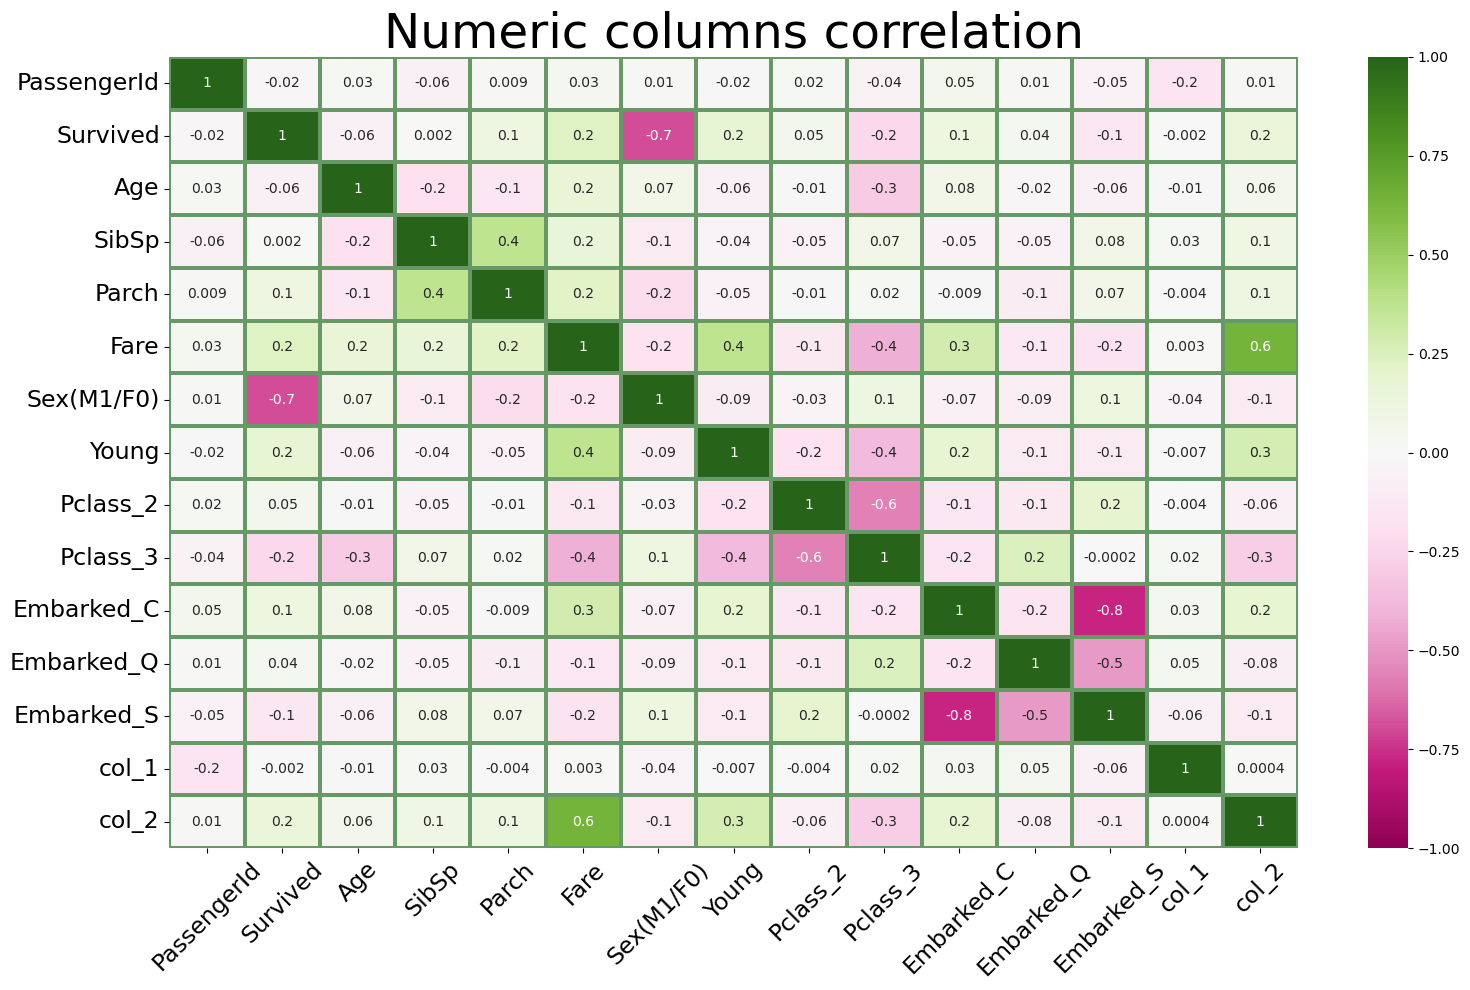

In [50]:
fig = plt.figure()
fig.set_size_inches(16, 10)

hm = sns.heatmap(sorted_df.corr(),
                 annot=True, 
                 fmt='.1g',
                 xticklabels=sorted_df.corr().columns,
                 yticklabels=sorted_df.corr().columns,
                 cmap='PiYG',
                 vmin=-1,
                 vmax=1, 
                 center=0,
                 linewidths=1.5,
                 linecolor='#669966')

hm.set_facecolor=('#DEB887')
hm.set_title('Numeric columns correlation', fontsize=35, color='black')
hm.tick_params(axis='both', labelsize=17, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
sorted_df = sorted_df.drop('Embarked_S', axis=1)

In [52]:
def get_redundant_pairs(sorted_df):
    pairs_to_drop = set()
    cols = sorted_df.columns
    for i in range(0, sorted_df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = sorted_df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(sorted_df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_data, 15))

Top Absolute Correlations
Survived  Sex(M1/F0)    0.688371
Fare      col_2         0.640046
Pclass_2  Pclass_3      0.563180
Fare      Pclass_3      0.419616
Young     Pclass_3      0.379189
SibSp     Parch         0.373587
Fare      Young         0.371716
Age       Pclass_3      0.301374
Fare      Embarked_C    0.286241
Pclass_3  col_2         0.281990
Young     col_2         0.278524
Pclass_3  Embarked_Q    0.243706
Survived  Pclass_3      0.242183
          Fare          0.233568
Parch     Fare          0.221522
dtype: float64


In [53]:
cutter = VarianceThreshold(threshold=0.01)
cutter.fit(sorted_df)

cutter.get_feature_names_out()

array(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex(M1/F0)', 'Young', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'col_1', 'col_2'], dtype=object)

In [54]:
sorted_df.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex(M1/F0)', 'Young', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'col_1', 'col_2'],
      dtype='object')

In [55]:
test_df = sorted_df[891::].drop('Survived', axis=1)
target_df = sorted_df[891::]['Survived']

In [56]:
X_train = sorted_df[:891].drop('Survived', axis=1)
X_test = test_df
y_train = sorted_df[:891]['Survived']
y_test = target_df

# Modeling

###  LogisticRegression

In [57]:
# pipe_lr = Pipeline([('scaler', StandardScaler()),
#                    ('LR', LogisticRegression(verbose=0, max_iter=10000))])

# param_grid = {
#     'LR__penalty': ['l1', 'l2'],
#     'LR__C': [1e-5, 0.0001, 0.001, 0.1, 1, 10],
#     'LR__fit_intercept': [True, False],
#     'LR__intercept_scaling': [1, 2],
#     'LR__class_weight': [None, 'balanced'],
#     'LR__random_state': [42],
#     'LR__solver': ['liblinear', 'saga'],
# }


# lr_search = GridSearchCV(pipe_lr, param_grid=param_grid, cv=5)

# lr_search.fit(X_train, y_train)

# y_pred_lr_train = lr_search.predict(X_train)
# y_pred_lr = lr_search.predict(X_test)

In [58]:
# print(f"ACCURCY SCORE LOGISTIC REGRESSION = {round(accuracy_score(y_test, y_pred_lr), 5)}")
# print(f"PRECISION SCORE LOGISTIC REGRESSION = {round(precision_score(y_test, y_pred_lr), 5)}")
# print(f"RECALL SCORE LOGISTIC REGRESSION = {round(recall_score(y_test, y_pred_lr), 5)}")
# print(f"F1 SCORE LOGISTIC REGRESSION = {round(f1_score(y_test, y_pred_lr), 5)}")

###  SVM


In [59]:
# svm_pipe = Pipeline([('scaler', StandardScaler()),
#                     ('svm', LinearSVC(max_iter=100000))])

# param_svc = {
#     'svm__C': [0.001, 0.01, 0.1, 1, 10, 12, 14, 16 ],
#     'svm__penalty': ['l2'],
#     'svm__loss': ['hinge', 'squared_hinge'],
#     'svm__tol': [1e-3, 1e-4, 1e-5],
#     'svm__class_weight': [None, 'balanced']
# }

# svm_search = GridSearchCV(svm_pipe, param_grid=param_svc, cv=10)

# svm_search.fit(X_train, y_train)

# y_pred_svm_train = svm_search.predict(X_train)
# y_pred_svm = svm_search.predict(X_test)

In [60]:
# print(f"ACCURCY SCORE SVM = {round(accuracy_score(y_test, y_pred_svm), 5)}")
# print(f"Precision SCORE SVM = {round(precision_score(y_test, y_pred_svm), 5)}")
# print(f"RECALL SCORE SVM = {round(recall_score(y_test, y_pred_svm), 5)}")
# print(f"F1 SCORE SVM = {round(f1_score(y_test, y_pred_svm), 5)}")

### KNN

In [61]:
# knn = KNeighborsClassifier()

# knn_pipe = Pipeline([('scaler', StandardScaler()),
#                      ('knn', KNeighborsClassifier())])


# param_grid = {'knn__n_neighbors': [ 1, 7, 9, 10, 11, 12],
#                'knn__weights': ['uniform', 'distance'],
#                'knn__p': [1, 2, 3, 4, 7, 8, 9],
#                'knn__metric': ['minkowski', 'euclidean', 'manhattan']}

# knn_search = GridSearchCV(knn_pipe, param_grid=param_grid, cv=5)

# knn_search.fit(X_train, y_train)

# y_pred_knn_train = knn_search.predict(X_train)
# y_pred_knn = knn_search.predict(X_test)

In [62]:
# print(f"ACCURACY SCORE KNN = {round(accuracy_score(y_test, y_pred_knn), 5)}")
# print(f"PRECISION SCORE KNN = {round(precision_score(y_test, y_pred_knn), 5)}")
# print(f"RECALL SCORE KNN = {round(recall_score(y_test, y_pred_knn), 5)}")
# print(f"F1 SCORE KNN = {round(f1_score(y_test, y_pred_knn), 5)}")

### Decision tree

In [63]:
# %%time

# dt = DecisionTreeClassifier(random_state=42)

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [4, 5, 6],
#     'min_samples_split': [2, 4, 5],
#     'min_samples_leaf': [2, 4, 5, 6, 7],
#     'max_features': [None, 'auto', 'sqrt', 'log2'],
#     'class_weight': [None, 'balanced'],
# }
  
# dt_search = GridSearchCV(dt, param_grid=param_grid, cv=10)
    
# dt_search.fit(X_train, y_train)

# y_pred_dt_train = dt_search.predict(X_train)
# y_pred_dt = dt_search.predict(X_test)

# best_model = dt_search.best_estimator_

# fig = plt.figure(figsize=(26, 20))
# tree.plot_tree(best_model, filled=True)
               
               
# plt.show()

In [64]:
# print(f" ACCURACY SCORE DECISION TREE: {round(accuracy_score(y_test, y_pred_dt), 5)}")
# print(f" PRECISION SCORE DECISION TREE: {round(precision_score(y_test, y_pred_dt), 5)}")
# print(f" RECALL SCORE DECISION TREE: {round(recall_score(y_test, y_pred_dt), 5)}")
# print(f" F1 SCORE DECISION TREE: {round(f1_score(y_test, y_pred_dt), 5)}")

# Ensemble

### Random Forest

In [65]:
object_cols = X_train.loc[:, X_train.dtypes==object].columns
numeric_cols = X_train.loc[:, X_train.dtypes!=object].columns

In [66]:
cols_for_ohe = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]
numeric_cols = list(X_train.select_dtypes(exclude='object').columns)


cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]
numeric_cols_idx = [list(X_train.columns).index(col) for col in numeric_cols]

In [67]:
transformer = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx),
     ('StandardScaler', StandardScaler(), numeric_cols_idx)]

col_transformer = ColumnTransformer(transformers=transformer)

col_transformer.fit(X_train, y_train)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(), []),
                                ('MeanTargetEncoder', TargetEncoder(), []),
                                ('StandardScaler', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])])

In [68]:
%%time
random_forest = Pipeline([('col_transformer', col_transformer),
                   ('random_forest', RandomForestClassifier(random_state=42))])

param_grid = {
    'random_forest__n_estimators': [140],
    'random_forest__criterion': ["gini", "entropy"],
    "random_forest__max_depth": [ 6, 7, 8, 9],
    "random_forest__min_samples_split": [5, 6, 7, 8, 9, 10],
    "random_forest__min_samples_leaf": [2, 3, 4, 5]
}
random_forest_search = GridSearchCV(random_forest,
                                     param_grid=param_grid, cv=8)
                                                       
random_forest_search.fit(X_train, y_train)

y_pred_random_forest_train = random_forest_search.predict(X_train)
y_pred_random_forest = random_forest_search.predict(X_test)

Wall time: 7min 55s


In [69]:
print(f" ACCURACY SCORE RANDOM FOREST: {round(accuracy_score(y_test, y_pred_random_forest), 5)}")
print(f" PRECISION SCORE RANDOM FOREST: {round(precision_score(y_test, y_pred_random_forest), 5)}")
print(f" RECALL SCORE RANDOM FOREST: {round(recall_score(y_test, y_pred_random_forest), 5)}")
print(f" F1 SCORE RANDOM FOREST: {round(f1_score(y_test, y_pred_random_forest), 5)}")

 ACCURACY SCORE RANDOM FOREST: 0.8756
 PRECISION SCORE RANDOM FOREST: 0.90323
 RECALL SCORE RANDOM FOREST: 0.73684
 F1 SCORE RANDOM FOREST: 0.81159


### Stacking

In [70]:
%%time

lr = Pipeline([('col_transformer', col_transformer),
              ('lr', LogisticRegression(random_state=42))])
svm = Pipeline([('col_transformer', col_transformer),
               ('svm', LinearSVC(random_state=42))])
knn = Pipeline([('col_transformer', col_transformer),
               ('knn', KNeighborsClassifier())])
dt = Pipeline([('col_transformer', col_transformer),
              ('dt', DecisionTreeClassifier(random_state=42))])


estimators = [('knn', knn),
              ('lr', lr),
              ('dt', dt),
              ('svm', svm)]
    
final = RandomForestClassifier(random_state=42)

param_grid = {
    'knn__knn__n_neighbors': [7],
    'knn__knn__p': [2, 3],
    'dt__dt__max_depth': [5, 7],
    'dt__dt__min_samples_split': [3, 5],
    'svm__svm__C': [0.01, 0.1],
    'svm__svm__penalty': ['l2'],
    'lr__lr__penalty': ['l2'],
    'lr__lr__C': [1e-5],
    'final_estimator__n_estimators': [30, 55],
    'final_estimator__max_depth': [5, 7],
}

stacking = StackingClassifier(estimators=estimators, final_estimator=final, cv=10)

stacking_search = GridSearchCV(stacking, param_grid=param_grid, cv=5)

stacking_search.fit(X_train, y_train)

y_pred_stacking_train = stacking_search.predict(X_train)
y_pred_stacking = stacking_search.predict(X_test)

Wall time: 5min 7s


In [71]:
print(f" ACCURACY SCORE STAKING: {round(accuracy_score(y_test, y_pred_stacking), 5)}")
print(f" PRECISION SCORE STAKING: {round(precision_score(y_test, y_pred_stacking), 5)}")
print(f" RECALL SCORE STAKING: {round(recall_score(y_test, y_pred_stacking), 5) }")
print(f" F1 SCORE STAKING: {round(f1_score(y_test, y_pred_stacking), 5)}")

 ACCURACY SCORE STAKING: 0.90909
 PRECISION SCORE STAKING: 0.91912
 RECALL SCORE STAKING: 0.82237
 F1 SCORE STAKING: 0.86806


### CatBoost 

In [72]:
%%time

catboost = CatBoostClassifier(verbose=0)

param_grid = {
    'iterations': [5, 15, 20, 30, 35, 45, 50, 65, 90],
    'depth': [5, 6, 7], 
    'learning_rate': [0.001, 0.01, 0.1, 1],
}

catboost_search = GridSearchCV(catboost, param_grid=param_grid)
catboost_search.fit(X_train, y_train)

y_pred_catboost_train = catboost_search.predict(X_train)
y_pred_catboost = catboost_search.predict(X_test)

In [73]:
print(f" ACCURACY SCORE CATBOOST: {round(accuracy_score(y_test, y_pred_catboost), 5)}")
print(f" PRECISION SCORE CATBOOST: {round(precision_score(y_test, y_pred_catboost), 5)}")
print(f" RECALL SCORE CATBOOST: {round(recall_score(y_test, y_pred_catboost), 5)}")
print(f" F1 SCORE CATBOOST: {round(f1_score(y_test, y_pred_catboost), 5)}")

 ACCURACY SCORE CATBOOST: 0.96651
 PRECISION SCORE CATBOOST: 0.96
 RECALL SCORE CATBOOST: 0.94737
 F1 SCORE CATBOOST: 0.95364


### GradientBoosting

In [74]:
%%time

grad_boosting = GradientBoostingClassifier(random_state=42)
                                         
params_gradboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [65, 90],
    'max_depth': [5, 7, 8],
    'min_samples_split': [5, 10, 12],
    'min_samples_leaf': [2, 4, 5, 6, 7],
    'max_features': ['sqrt']
}

gradboost_search = GridSearchCV(grad_boosting, param_grid=params_gradboost, cv=5)

gradboost_search.fit(X_train, y_train)

y_pred_gb_train =  gradboost_search.predict(X_train)
y_pred_gb = gradboost_search.predict(X_test)

Wall time: 4min 56s


In [75]:
print(f" ACCURACY SCORE GRADIENT BOOSTING: {round(accuracy_score(y_test, y_pred_gb), 5)}")
print(f" PRECISION SCORE GRADIENT BOOSTING: {round(precision_score(y_test, y_pred_gb), 5)}")
print(f" RECALL SCORE GRADIENT BOOSTING: {round(recall_score(y_test, y_pred_gb), 5)}")
print(f" F1 SCORE GRADIENT BOOSTING: {round(f1_score(y_test, y_pred_gb), 5)}")

 ACCURACY SCORE GRADIENT BOOSTING: 0.82775
 PRECISION SCORE GRADIENT BOOSTING: 0.88462
 RECALL SCORE GRADIENT BOOSTING: 0.60526
 F1 SCORE GRADIENT BOOSTING: 0.71875


### LightGBM 

In [76]:
%%time

lightgbm = LGBMClassifier()

params = {'n_estimators': [5, 15, 20, 30, 35, 45, 50, 65, 90],
          'max_depth': [5, 6, 7],
          'learning_rate': [0.001, 0.01, 0.1]}
#           'boosting_type': ['gbdt', 'dart', 'goss'],
#           'reg_alpha': [0.0, 0.1, 0.5],
#           'reg_lambda': [0.0, 0.1, 0.5]}
        
gbm_search = GridSearchCV(lightgbm, param_grid=params)

gbm_search.fit(X_train, y_train)

y_pred_gbm_train = gbm_search.predict(X_train)
y_pred_gbm = gbm_search.predict(X_test)

Wall time: 17.9 s


In [77]:
print(f" ACCURACY SCORE LIGHTGBM: {round(accuracy_score(y_test, y_pred_gbm), 5)}")
print(f" PRECISION SCORE LIGHTGBM: {round(precision_score(y_test, y_pred_gbm), 5)}")
print(f" RECALL SCORE LIGHTGBM: {round(recall_score(y_test, y_pred_gbm), 5)}")
print(f" F1 SCORE LIGHTGBM: {round(f1_score(y_test, y_pred_gbm), 5)}")

 ACCURACY SCORE LIGHTGBM: 0.90191
 PRECISION SCORE LIGHTGBM: 0.90511
 RECALL SCORE LIGHTGBM: 0.81579
 F1 SCORE LIGHTGBM: 0.85813


### XGBoost

In [78]:
%%time

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

params_xgboost = {'n_estimators': [5, 15, 20, 30, 35, 45, 50, 65, 90],
                  'max_depth': [5, 6, 7],
                  'learning_rate': [0.0001,0.001, 0.01,],
                  'reg_lambda': [0.0, 0.1, 0.5]}

xgboost_search = GridSearchCV(xgb, param_grid=params_xgboost)

xgboost_search.fit(X_train, y_train)

y_pred_xgb_train = xgboost_search.predict(X_train)
y_pred_xgb = xgboost_search.predict(X_test)

Wall time: 1min 28s


In [79]:
print(f" ACCURACY SCORE XGBOOST: {round(accuracy_score(y_test, y_pred_xgb), 5)}")
print(f" PRECISION SCORE XGBOOST: {round(precision_score(y_test, y_pred_xgb), 5)}")
print(f" RECALL SCORE XGBOOST: {round(recall_score(y_test, y_pred_xgb), 5)}")
print(f" F1 SCORE XGBOOST: {round(f1_score(y_test, y_pred_xgb), 5)}")

 ACCURACY SCORE XGBOOST: 0.79904
 PRECISION SCORE XGBOOST: 0.71795
 RECALL SCORE XGBOOST: 0.73684
 F1 SCORE XGBOOST: 0.72727


# Summary

1. Checked some hypotheses about the survivors of the Titanic.
2. Predicted people who survived or died.
3. Compared the results of ensemble models.

In [80]:
models = pd.DataFrame({
    'Model': ['Random Forest Classifier', 
              'XGboost', 'LightGBM', 'CatBoost',
              'GradientBoostingClassifier',
              'StackingClassifier'],
    'Accuracy on test': [accuracy_score(y_test, y_pred_random_forest),
                         accuracy_score(y_test, y_pred_xgb),
                         accuracy_score(y_test, y_pred_gbm),
                         accuracy_score(y_test, y_pred_catboost),
                         accuracy_score(y_test, y_pred_gb),
                         accuracy_score(y_test, y_pred_stacking)],
    'Accuracy on train': [accuracy_score(y_train, y_pred_random_forest_train),
                         accuracy_score(y_train, y_pred_xgb_train),
                         accuracy_score(y_train, y_pred_gbm_train),
                         accuracy_score(y_train, y_pred_catboost_train),
                         accuracy_score(y_train, y_pred_gb_train),
                         accuracy_score(y_train, y_pred_stacking_train)]})

models.sort_values(by='Accuracy on test', ascending=False)

,Model,Accuracy on test,Accuracy on train
3,CatBoost,0.966507,0.830527
5,StackingClassifier,0.909091,0.860831
2,LightGBM,0.901914,0.877666
0,Random Forest Classifier,0.875598,0.918070
4,GradientBoostingClassifier,0.827751,0.966330
1,XGboost,0.799043,0.857464


# Submission

In [84]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": catboost_search.predict(X_test)
    })
submission.to_csv('submission.csv', index=False)